In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
ddf = pd.read_csv("diabetes.csv")
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
ddf.isnull().sum()
# no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
ddf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
ddf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
cols = ['Pregnancies', 'Glucose','BloodPressure', 'Insulin', 'BMI', 'Age']


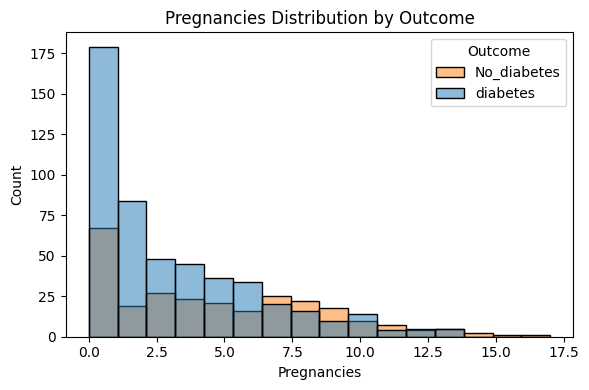

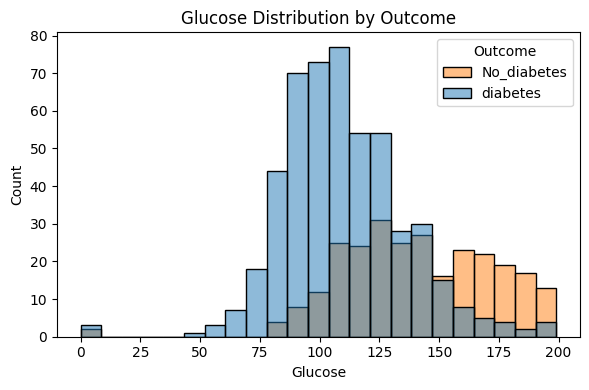

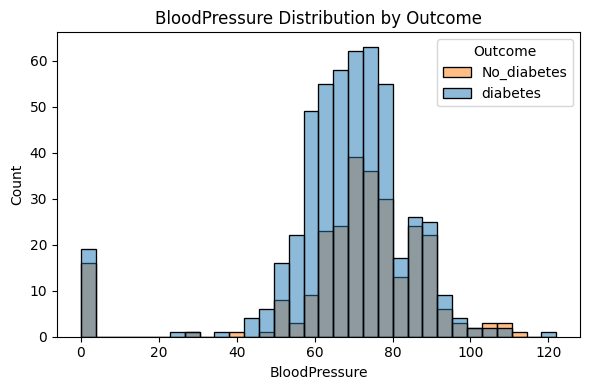

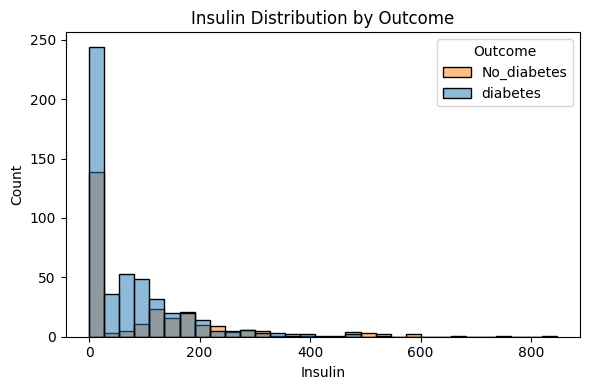

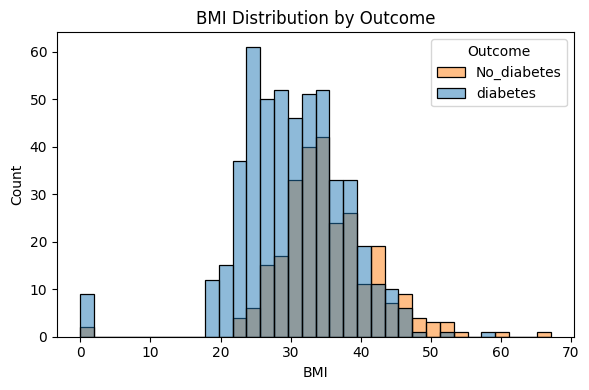

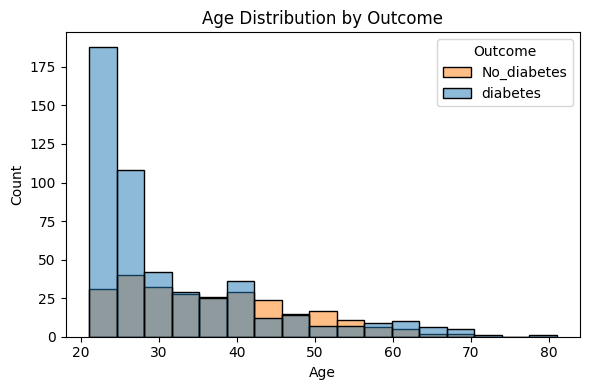

In [70]:
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=ddf, x=col, hue='Outcome', kde=False, stat='count', element='bars')
    plt.title(f'{col} Distribution by Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['No_diabetes', 'diabetes'])
    plt.tight_layout()
    plt.show()

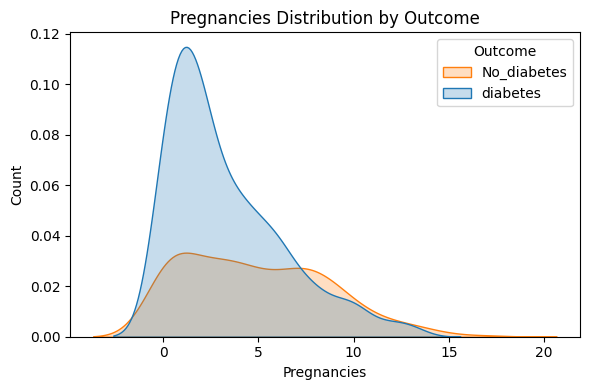

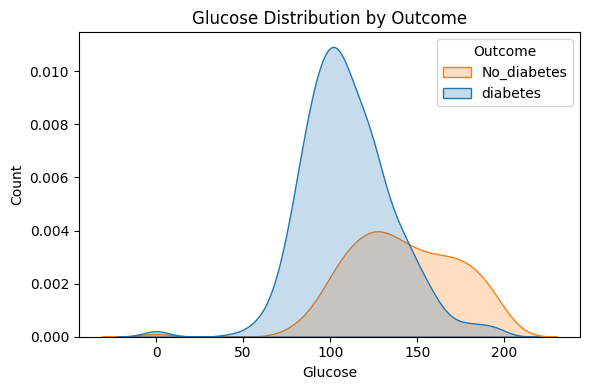

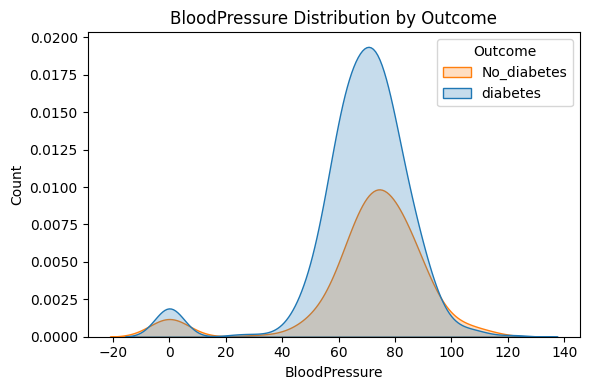

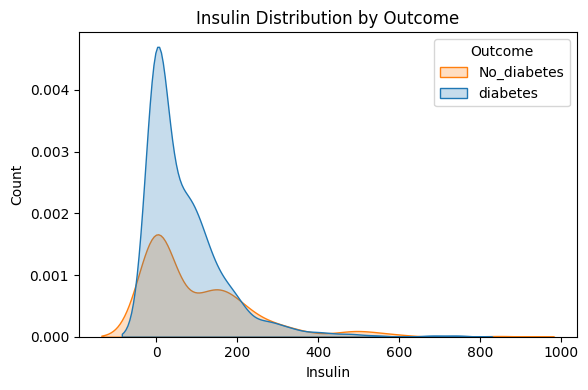

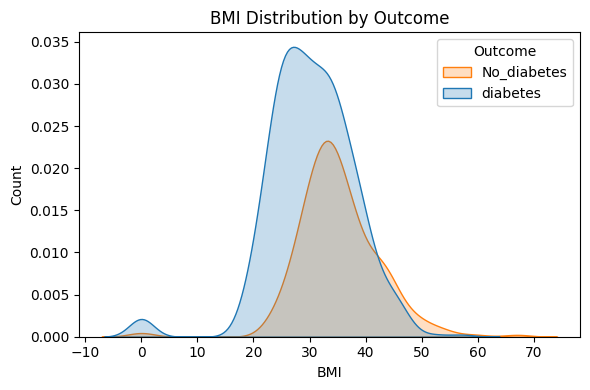

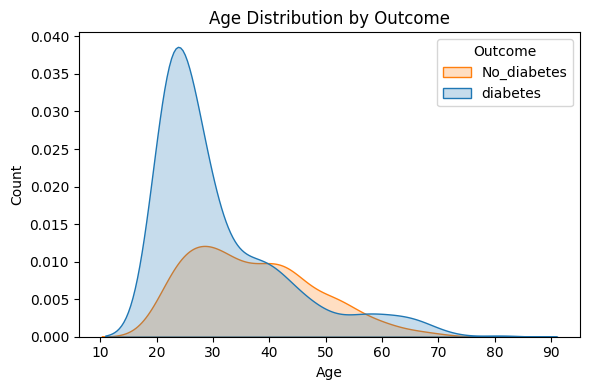

In [21]:
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=ddf, x=col, hue='Outcome', fill=True)
    plt.title(f'{col} Distribution by Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['No_diabetes', 'diabetes'])
    plt.tight_layout()
    plt.show()


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

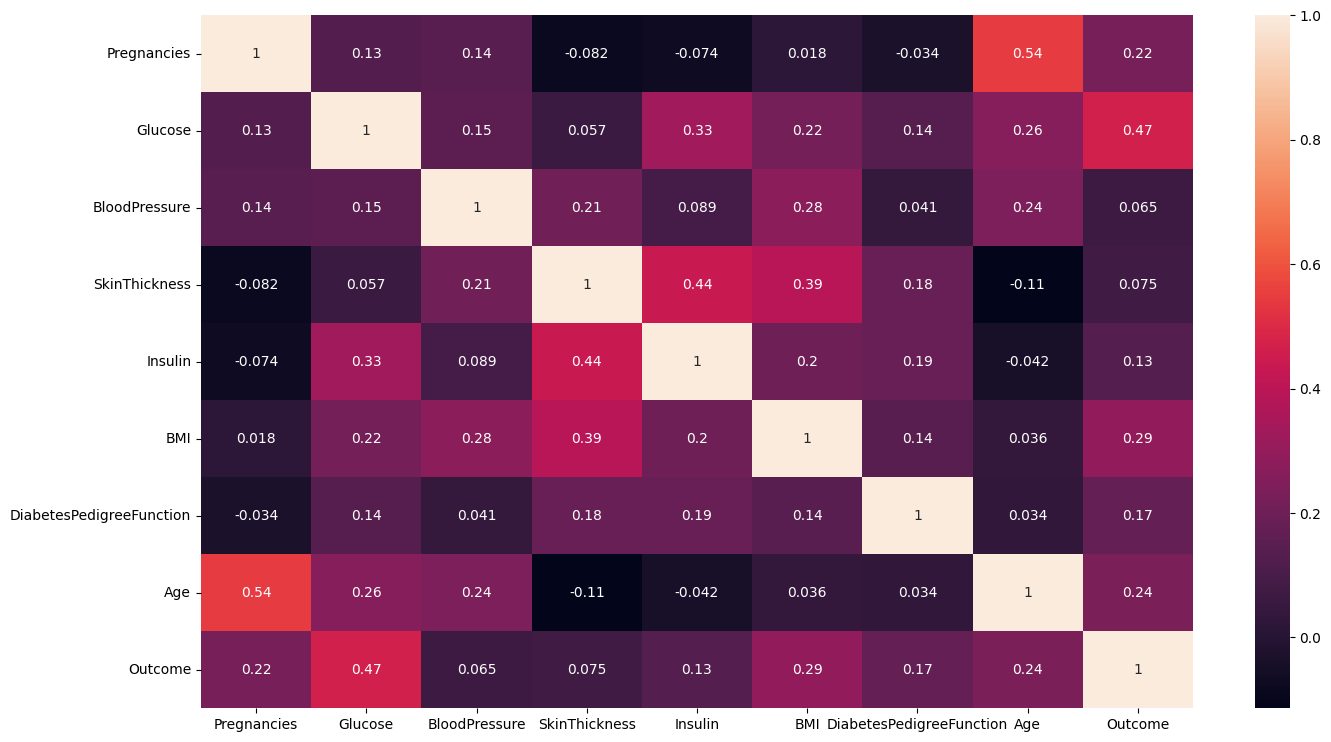

In [22]:
corr_metrix = ddf.corr()
print(corr_metrix)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(corr_metrix, annot=True, square=False, color='blue')

In [23]:
X = ddf.drop("Outcome", axis=1)
y = ddf["Outcome"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(614, 8)

In [49]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # First hidden layer (increased units)
    Dense(32, activation='relu'),                     # Second hidden layer
    Dense(16, activation='relu'),                     # Third hidden layer
    Dense(8, activation='relu'),                      # Fourth hidden layer
    Dense(1, activation='sigmoid')                    # Output layer (for binary classification)
])

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

In [51]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(f"\nval_accuracy is: {val_accuracy * 100:.2f}%")


val_accuracy is: 71.63%


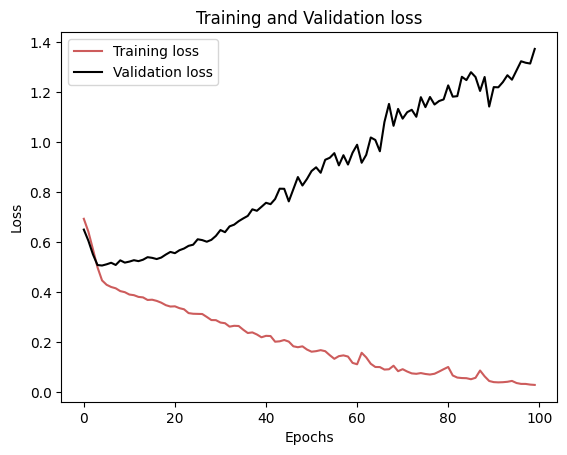

In [52]:
history_ddf = pd.DataFrame(history.history)

plt.plot(history_ddf.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_ddf.loc[:, ['val_loss']],"#000000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

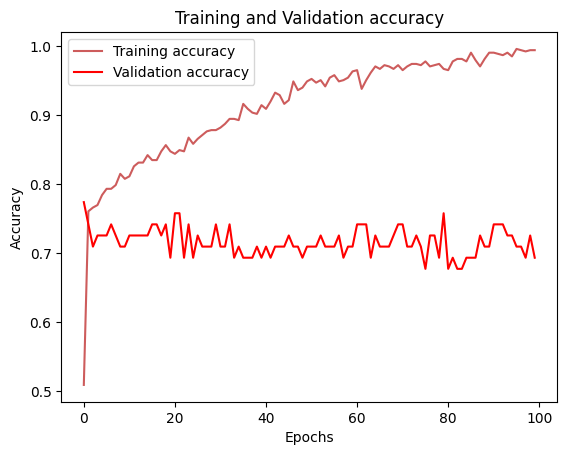

In [53]:
history_ddf = pd.DataFrame(history.history)

plt.plot(history_ddf.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_ddf.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [54]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


In [ ]:
accuracy = 0.7077922077922078

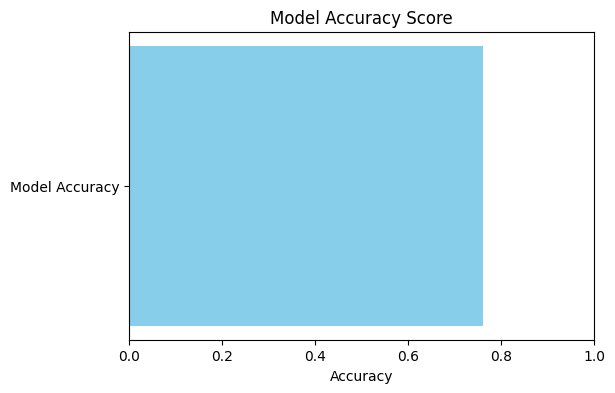

In [57]:
plt.figure(figsize=(6, 4))
plt.barh(['Model Accuracy'], [accuracy], color='skyblue')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.xlabel('Accuracy')
plt.title('Model Accuracy Score')

# Display the plot
plt.show()

In [58]:
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

ROC AUC: 0.718457300275482


In [59]:
fpr, tpr = roc_curve(y_test, y_pred_prob)[0:2]

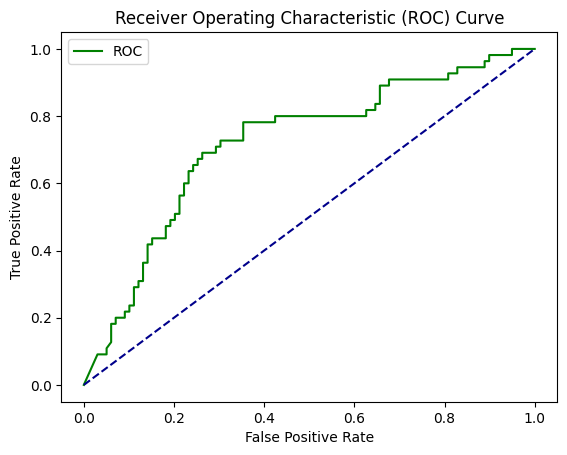

In [60]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [61]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [63]:
data = {
    'precision': [0.81, 0.57, 0.71, 0.69, 0.73],
    'recall': [0.71, 0.71, 0.71, 0.71, 0.71],
    'f1-score': [0.76, 0.63, 0.71, 0.70, 0.71],
    'support': [99, 55, 154, 154, 154]
}

# Class labels
labels = ['0', '1', 'accuracy', 'macro avg', 'weighted avg']

# Create DataFrame
df = pd.DataFrame(data, index=labels)

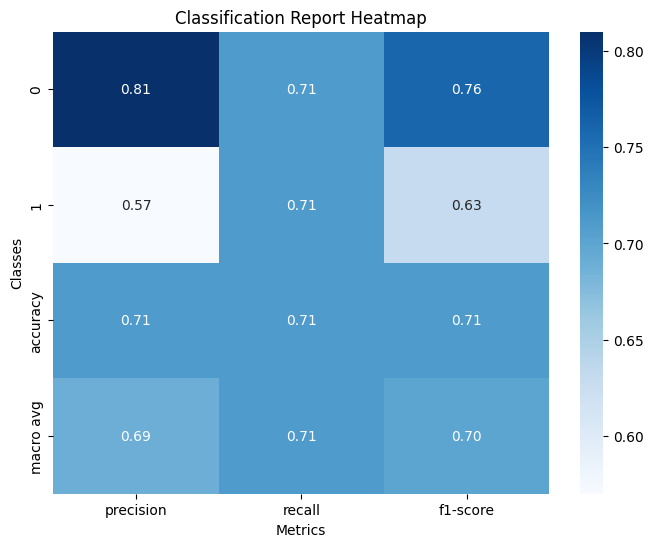

In [64]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Set plot labels and title
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Display the plot
plt.show()

In [65]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[70 29]
 [16 39]]


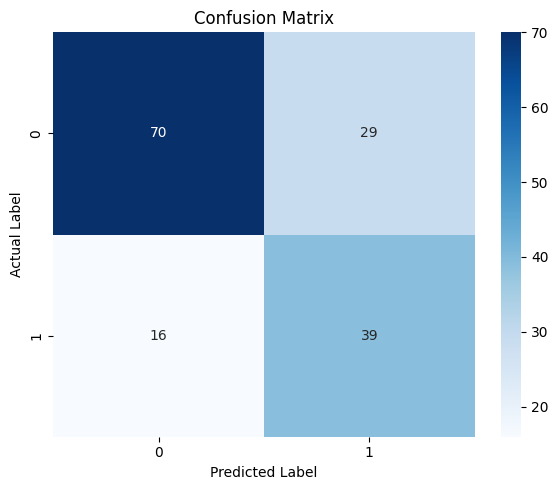

In [66]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()